In [1]:
import pandas as pd
import numpy as np
import csv

import spacy
from spacy import displacy
from gensim.models import word2vec
pd.options.mode.chained_assignment = None
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'spacy'

In [7]:
import pandas as pd
dataset_path1 = 'NOTEEVENTS.csv'
#dataset_path2 = 'DIAGNOSES_ICD.csv'
df1 = pd.read_csv(dataset_path1, low_memory=False)
#df2 = pd.read_csv(dataset_path2)

In [9]:
df1.CATEGORY.value_counts()

CATEGORY
Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: count, dtype: int64

In [12]:
df1.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')

In [27]:
ecg_notes = df1[df1.loc[:, 'CATEGORY'] == 'Radiology'].reset_index(drop=True)

In [29]:
x = ecg_notes.loc[1, 'TEXT']
print(x)

[**2153-1-12**] 10:03 PM
 CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 81155**]
 Reason: s/p l scv cvl, check line and r/o ptx
 ______________________________________________________________________________
 [**Hospital 3**] MEDICAL CONDITION:
  73 year old woman with gangrene rt foot s/p rt fem-tib
 REASON FOR THIS EXAMINATION:
  s/p l scv cvl, check line and r/o ptx
 ______________________________________________________________________________
                                 FINAL REPORT
 CLINICAL INDICATION: Central venous catheter placement.

 Comparison is made to previous study of one day earlier.

 There has been interval placement of a left subclavian central venous catheter
 which terminates at the junction of the left brachiocephalic vein and superior
 vena cava. No pneumothorax is identified.

 The cardiac silhouette remains enlarged. There are bilateral pleural effusions
 and adjacent areas of increased lung opacificati

In [8]:
ecg_notes = df1[[df1.CATEGORY] == 'ECG']
ecg_notes

KeyError: False

In [ ]:
ecg_notes.to_csv(ecg_notes.csv)

In [ ]:
x = df1.loc[1,"TEXT"]
print(x)

Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]

Date of Birth:                    Sex:  F

Service:  MICU and then to [**Doctor Last Name **] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare.  Two days prior to admission,
she was started on a prednisone taper and one day prior to
admission she required oxygen at home in order to maintain
oxygen saturation greater than 90%.  She has also been on
levofloxacin and nebulizers, and was not getting better, and
presented to the [**Hospital1 18**] Emergency Room.

In the [**Hospital3 **] Emergency Room, her oxygen saturation was
100% on CPAP.  She was not able to be weaned off of this
despite nebulizer treatment and Solu-Medrol 125 mg IV x2.

Review of systems is negative for the following:  Fevers,
chills, nausea, vomiting, night sweats, change in we

In [ ]:
df1.to_csv('NOTEEVENTS_sample.csv')

In [ ]:
df1.columns, df2.columns

(Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
        'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
       dtype='object'),
 Index(['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code'], dtype='object'))

In [ ]:
notes = df1.copy()
diagnoses = df2.copy()
notes.columns = map(str.lower, notes)
notes.shape, diagnoses.shape

((2083180, 11), (1761, 5))

In [ ]:
headache_df = notes[notes.text.str.contains('headache', case=False)]
headache_df.shape

(39903, 11)

In [ ]:
merged_df = pd.merge(headache_df, diagnoses, on='hadm_id', how='inner')
merged_df.shape

(1768, 15)

In [ ]:
merged_df.icd9_code.value_counts()

4019     40
25000    35
51881    30
4280     29
486      28
         ..
5780      1
24220     1
1975      1
E8788     1
03842     1
Name: icd9_code, Length: 277, dtype: int64

In [ ]:
merged_df.category.value_counts()

Physician            1194
Discharge summary     207
Nursing               190
Nursing/other          89
Radiology              55
General                18
Nutrition              15
Name: category, dtype: int64

In [ ]:
rad_df = merged_df[merged_df['category']=='Radiology']
train_data = rad_df[rad_df['icd9_code']=='4019'].reset_index(drop=True)
train_data.shape

(5, 15)

In [ ]:
nlp = spacy.load('en_core_web_sm') # spacy model 

C:\Users\Joslyn\anaconda3\envs\scispacy_install\lib\site-packages\spacy\util.py:762: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.7). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
sample_texts = train_data['text'].tolist()
len(sample_texts), sample_texts

(5,
 ["[**2152-10-2**] 1:07 PM\n CT HEAD W/O CONTRAST                                            Clip # [**Clip Number (Radiology) 14552**]\n Reason: eval for bleed\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n  81 year old woman with HA and weakness, confusion.\n REASON FOR THIS EXAMINATION:\n  eval for bleed\n CONTRAINDICATIONS for IV CONTRAST:\n  renal insufficiency\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATION:  Headache and weakness and confusion.\n\n COMPARISON:  Brain MRI [**2149-6-17**].  Head CT of [**2150-9-10**].\n\n TECHNIQUE:  Non-contrast head CT.\n\n FINDINGS:  New in the interval are at least three moderate-to-large sized mass\n lesions, one within the right frontal lobe anteriorly, another within the\n right posterofrontoparietal region, and a third within the left parietal\n region.  There is a signif

In [ ]:
for text in sample_texts:
    doc = nlp(text)
    print(displacy.render(doc, style='ent', jupyter=True))
    

None


None


None


None


None


In [ ]:
doc = []
for i in range(len(sample_texts)):
    doc.append(nlp(sample_texts[i]))
    for ent in doc[-1].ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    print('*************************************************************************************************************')

2152-10-2 3 12 DATE
1:07 PM
  16 25 TIME
14552 123 128 DATE
81 year old 275 286 DATE
2149-6-17 636 645 DATE
2150-9-10 665 674 DATE
at least three 752 766 CARDINAL
one 806 809 CARDINAL
third 914 919 ORDINAL
at least three 1580 1594 CARDINAL
First 1688 1693 ORDINAL
4621 1715 1719 CARDINAL
14553 1751 1756 DATE
*************************************************************************************************************
2161-9-18 3 12 DATE
8:41 AM 16 23 TIME
W & W/O CONTRAST 33 49 ORG
103442 123 129 DATE
15 263 265 CARDINAL
63 year old 385 396 DATE
BRAIN 648 653 ORG
63 year old 670 681 DATE
T1- 756 759 PERSON
Comparison
  798 810 ORG
2161-9-15 843 852 DATE
*************************************************************************************************************
2161-9-15 3 12 DATE
MRA BRAIN W/O CONTRAST                    Clip 47 93 ORG
104041 123 129 DATE
63 year old 337 348 DATE
T1- 696 699 PERSON
T2- 701 704 GPE
286 871 874 CARDINAL
one day 1398 1405 DATE
286 1509 1512 CARDINAL
******

In [ ]:
sdf = sample_texts
corpus = []
for row in range(0, len(sdf)):
    str_tokens=[]
    tokens=nlp(sdf[row]).ents
    for i in range(0, len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus.append(str_tokens)

print(corpus)

[['2152-10-2', '1:07 PM\n ', '14552', '81 year old', '2149-6-17', '2150-9-10', 'at least three', 'one', 'third', 'at least three', 'First', '4621', '14553'], ['2161-9-18', '8:41 AM', 'W & W/O CONTRAST', '103442', '15', '63 year old', 'BRAIN', '63 year old', 'T1-', 'Comparison\n ', '2161-9-15'], ['2161-9-15', 'MRA BRAIN W/O CONTRAST                    Clip', '104041', '63 year old', 'T1-', 'T2-', '286', 'one day', '286'], ['2161-9-15', '3:06 PM\n ', 'HEADACHES\n ', '310', '172', '527', '2ND', '527', '2ND', 'CAROTID/CEREBRAL', 'CAROTID/CEREBRAL', '530', 'A-GRAM', '530', 'A-GRAM', 'GUID WIRES INFU/', '103440', 'CONSENT', 'DETAIL', 'the Endovascular Suite', '19', '4', 'Fr', 'three', '2161-9-15', '3:06 PM\n ', 'HEADACHES\n ', '310'], ['2161-9-14', '7:27 PM\n ', 'CT 150CC NONIONIC CONTRAST', 'NON IONIC', '150', '63 year old', 'Headaches', 'Contiguous', '150', 'Optiray', 'Multiplanar', '1cm', '1', '3']]


In [ ]:
model = word2vec.Word2Vec(corpus, min_count=1)
display(model.wv['BRAIN'])
model.wv.most_similar('BRAIN')

array([ 1.2994667e-03, -9.8054539e-03,  4.5892112e-03, -5.3763657e-04,
        6.3294168e-03,  1.7835780e-03, -3.1315617e-03,  7.7622500e-03,
        1.5533146e-03,  5.5149052e-05, -4.6144635e-03, -8.4524518e-03,
       -7.7666813e-03,  8.6698839e-03, -8.9248288e-03,  9.0354942e-03,
       -9.2830947e-03, -2.7566456e-04, -1.9053504e-03, -8.9335116e-03,
        8.6325882e-03,  6.7754746e-03,  3.0186656e-03,  4.8327683e-03,
        1.1252772e-04,  9.4268313e-03,  7.0231440e-03, -9.8535744e-03,
       -4.4322810e-03, -1.2905111e-03,  3.0464008e-03, -4.3229284e-03,
        1.4516516e-03, -7.8455200e-03,  2.7799383e-03,  4.7042333e-03,
        4.9387072e-03, -3.1784975e-03, -8.4303496e-03, -9.2190253e-03,
       -7.2120526e-04, -7.3280954e-03, -6.8131885e-03,  6.1220694e-03,
        7.1732658e-03,  2.1162750e-03, -7.8976909e-03, -5.7001160e-03,
        8.0513516e-03,  3.9194264e-03, -5.2404311e-03, -7.3897131e-03,
        7.7048072e-04,  3.4666376e-03,  2.0772913e-03,  3.1004737e-03,
      

[('172', 0.23263314366340637),
 ('63 year old', 0.21898643672466278),
 ('527', 0.17501164972782135),
 ('2ND', 0.16450338065624237),
 ('GUID WIRES INFU/', 0.16386021673679352),
 ('2161-9-14', 0.14416353404521942),
 ('2149-6-17', 0.1422375738620758),
 ('530', 0.10951896011829376),
 ('8:41 AM', 0.10783391445875168),
 ('Multiplanar', 0.10535924881696701)]

In [ ]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=20, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

dict_keys(['63 year old', '2161-9-15', 'T1-', 'A-GRAM', '530', 'CAROTID/CEREBRAL', '2ND', '527', 'HEADACHES\n ', '150', '310', '3:06 PM\n ', '286', 'at least three', '15', 'Comparison\n ', 'BRAIN', 'W & W/O CONTRAST', '103442', '104041', '8:41 AM', '2161-9-18', '14553', '4621', 'First', 'third', 'one', '2150-9-10', '2149-6-17', '81 year old', '14552', '1:07 PM\n ', 'MRA BRAIN W/O CONTRAST                    Clip', '3', 'T2-', 'three', '1cm', 'Multiplanar', 'Optiray', 'Contiguous', 'Headaches', 'NON IONIC', 'CT 150CC NONIONIC CONTRAST', '7:27 PM\n ', '2161-9-14', 'Fr', 'one day', '4', '19', 'the Endovascular Suite', 'DETAIL', 'CONSENT', '103440', 'GUID WIRES INFU/', '172', '1', '2152-10-2'])


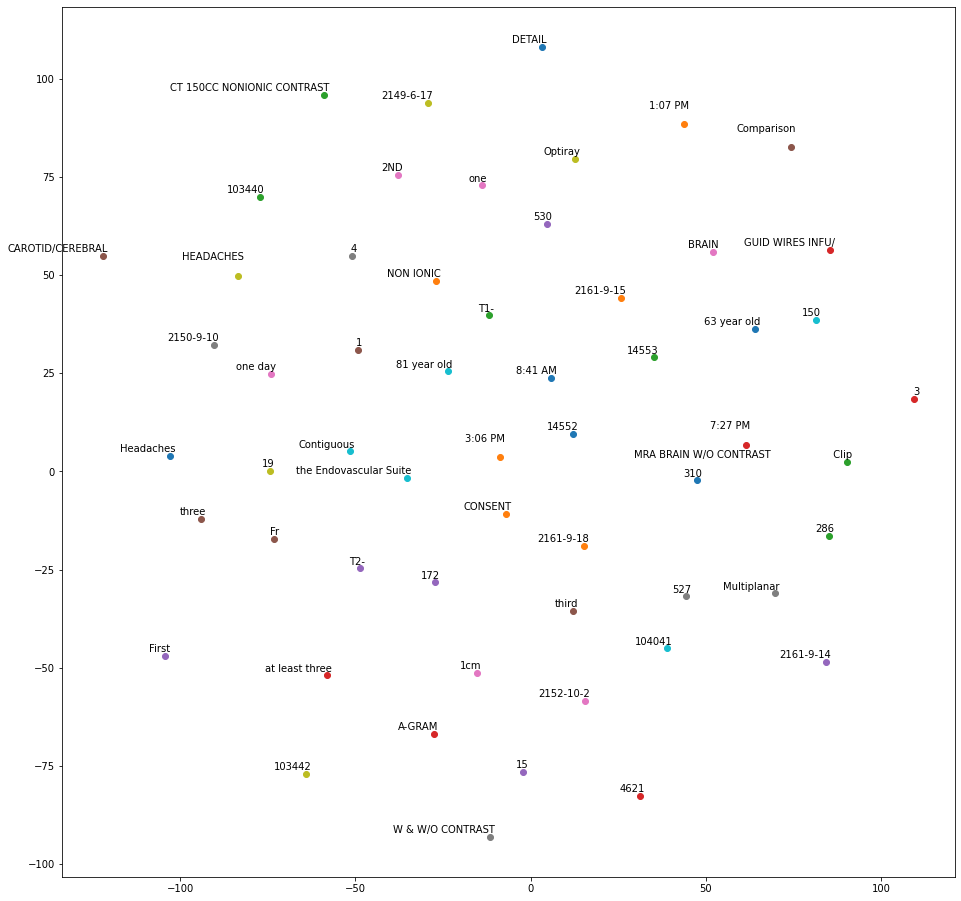

In [ ]:
vocabs = model.wv.key_to_index.keys()
print(vocabs)
new_v = np.array(list(vocabs))
tsne_plot(model,new_v)

In [ ]:
nlp = spacy.load("en_ner_bc5cdr_md") # now load sci spacy model

C:\Users\Joslyn\anaconda3\envs\scispacy_install\lib\site-packages\spacy\util.py:762: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.1.7). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
for text in sample_texts:
    doc = nlp(text)
    print(displacy.render(doc, style='ent', jupyter=True))

None


None


None


None


None


In [ ]:
sdf2 = sample_texts
corpus2 = []
for row in range(0, len(sdf2)):
    str_tokens=[]
    tokens=nlp(sdf2[row]).ents
    for i in range(0, len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus2.append(str_tokens)

print(corpus2)

[['confusion', 'renal insufficiency\n ______________________________________________________________________________\n                                 ', 'Headache', 'weakness', 'confusion', 'edema', 'hemorrhage', 'hydrocephalus', 'fracture', 'bone destruction', 'edema', 'Name8', 'NamePattern1', 'creatinine', 'melanoma', 'vasogenic edema'], ['vascular abnormality', 'meningitis', 'vascular abnormality\n ______________________________________________________________________________\n                                 ', 'meningitis', 'T2 hyperintensity', 'small vessel infarcts', 'hydrocephalus', 'intracranial hemorrhage', 'vessel ischemic infarcts', 'stenosis', 'aneurysmal dilatation'], ['SAH', 'subarachnoid hemorrhage', 'aneurysm', 'hydrocephalus', 'aneurysm'], ['CAROTID/CEREBRAL', 'CAROTID/CEREBRAL', 'VERT/CAROTID', 'VERT/CAROTID', 'hemorrhage', 'intracranial\n aneurysm', 'intracranial aneurysm', 'headaches', 'subarachnoid hemorrhage', 'intracranial aneurysm', 'bleeding', 'infection', 's

In [ ]:
model2 = word2vec.Word2Vec(corpus2, min_count=1)
display(model2.wv['aneurysm'])
model2.wv.most_similar('aneurysm')

array([-5.4193445e-04,  2.3593358e-04,  5.0954213e-03,  9.0065608e-03,
       -9.3055777e-03, -7.1226670e-03,  6.4555528e-03,  8.9762667e-03,
       -5.0122398e-03, -3.7759424e-03,  7.3877163e-03, -1.5405379e-03,
       -4.5358934e-03,  6.5613030e-03, -4.8562898e-03, -1.8207642e-03,
        2.8812622e-03,  9.8507281e-04, -8.2832864e-03, -9.4552701e-03,
        7.3175495e-03,  5.0740079e-03,  6.7685484e-03,  7.5964280e-04,
        6.3556382e-03, -3.4029512e-03, -9.4305136e-04,  5.7655410e-03,
       -7.5220908e-03, -3.9340220e-03, -7.5014285e-03, -9.3395141e-04,
        9.5426226e-03, -7.3306225e-03, -2.3403338e-03, -1.9243944e-03,
        8.0764247e-03, -5.9221308e-03,  3.8194994e-05, -4.7604986e-03,
       -9.5996326e-03,  5.0065857e-03, -8.7529691e-03, -4.4050892e-03,
       -3.0191464e-05, -3.0515320e-04, -7.6653571e-03,  9.6098669e-03,
        4.9862610e-03,  9.2391670e-03, -8.1546381e-03,  4.4954652e-03,
       -4.1369125e-03,  8.2554668e-04,  8.4956018e-03, -4.4662883e-03,
      

[('vascular abnormality', 0.21916216611862183),
 ('VERT/CAROTID', 0.21647903323173523),
 ('aneurysmal dilatation', 0.19563674926757812),
 ('infection', 0.16948942840099335),
 ('extra-axial hemorrhage', 0.15176548063755035),
 ('r/o bleed', 0.14221757650375366),
 ('Headaches', 0.10876662284135818),
 ('vascular malformation', 0.09977609664201736),
 ('atherosclerosis', 0.09648516774177551),
 ('NamePattern1', 0.09342233836650848)]

In [ ]:
def tsne_plot1(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

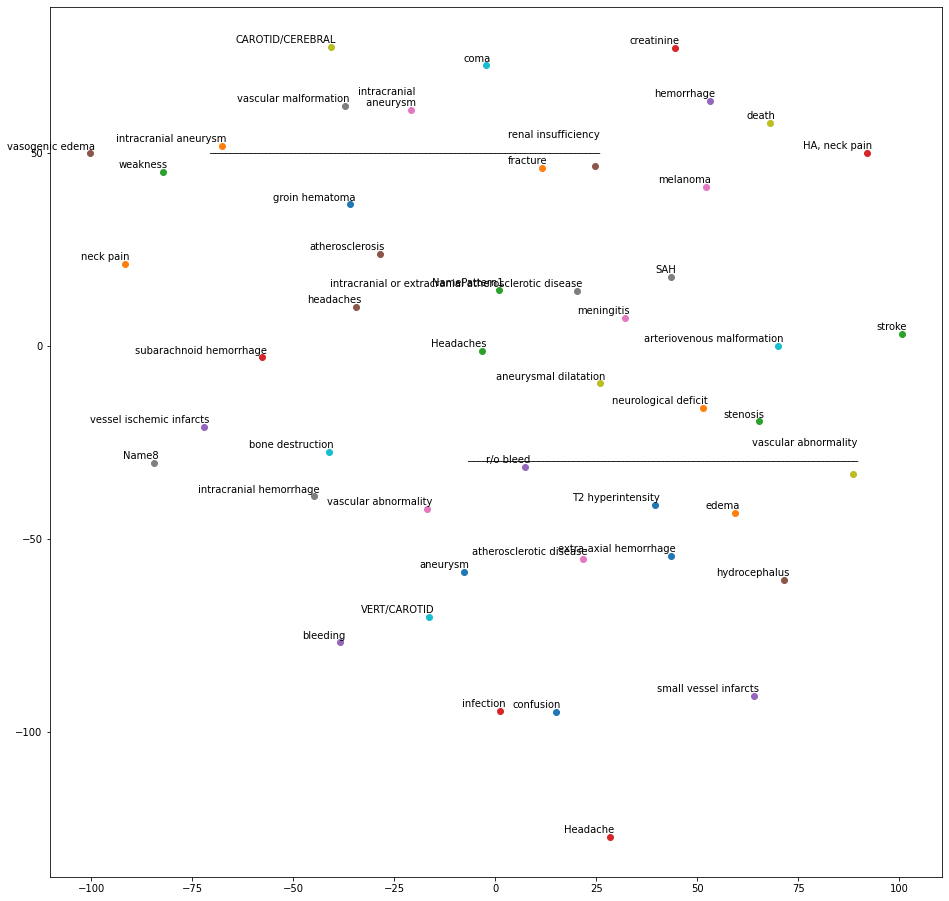

In [ ]:
vocabs2 = model2.wv.key_to_index.keys()
new_v2 = np.array(list(vocabs2))
tsne_plot1(model2,new_v2)

In [3]:
import medspacy
from medspacy.ner import TargetRule
from medspacy.visualization import visualize_ent

ModuleNotFoundError: No module named 'medspacy'

In [ ]:
nlp = medspacy.load()
print(nlp.pipe_names)

['medspacy_pyrush', 'medspacy_target_matcher', 'medspacy_context']


In [ ]:
target_matcher = nlp.get_pipe("medspacy_target_matcher")
target_matcher

In [ ]:
target_rules = [
    TargetRule("confusion", "SYMPTOM"),
    TargetRule("weakness", "SYMTPOM"),
    TargetRule("HEADACHE", "SYMTPOM"),
    TargetRule("artery", "ANATOMICAL STRUCTURE"),
    TargetRule("head", "ANATOMICAL STRUCTURE"),
    TargetRule("frontal lobe", "ANATOMICAL STRUCTURE"),
    TargetRule("posterofrontoparietal", "ANATOMICAL REGION"),
    TargetRule("parietal", "ANATOMICAL REGION")
]

target_matcher.add(target_rules)

In [ ]:
for row in text:
    doc=nlp(row)
    visualize_ent(doc)

C:\Users\Joslyn\AppData\Roaming\Python\Python36\site-packages\medspacy\common\medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)


C:\Users\Joslyn\AppData\Roaming\Python\Python36\site-packages\medspacy\common\medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)


C:\Users\Joslyn\AppData\Roaming\Python\Python36\site-packages\medspacy\common\medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)


C:\Users\Joslyn\AppData\Roaming\Python\Python36\site-packages\medspacy\common\medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)


C:\Users\Joslyn\AppData\Roaming\Python\Python36\site-packages\medspacy\common\medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)
